In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import manifold

df = pd.read_csv("C:/Users/jtcUser/Documents/Systems/Training/PythonCourse/Section3/files/heart.csv")
target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head()

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163


In [ ]:
## Scatter Matrix is pandas version of pairplot

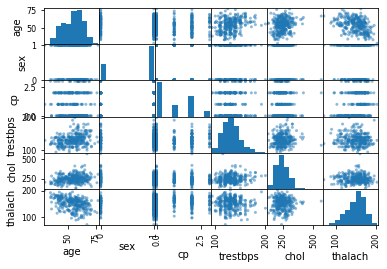

In [2]:
## pandas scatter matrix
pd.plotting.scatter_matrix(df);

In [4]:
df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


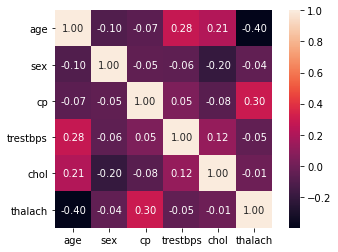

In [5]:
## seaborn heatmap
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True);

In [8]:
## 4 dimensional spiral

## creating the data set
np.random.seed(0)
n = 2000
t = np.linspace(0, 20, n)
x = t * np.sin(t) + 0.2 * np.random.normal(size=n)
y = t * np.cos(t) + 0.2 * np.random.normal(size=n)
z = np.log(t + 1) * np.sin(np.sqrt(t)) + 0.1 * np.random.normal(size=n)
a = np.log(t + 1) * np.cos(np.sqrt(t)) + 0.1 * np.random.normal(size=n)

df2 = pd.DataFrame({"x": x, "y": y, "z": z, "a": a})
data = df2.to_numpy()

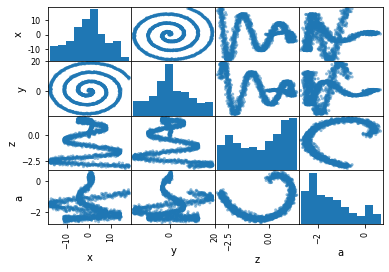

In [10]:
## Pandas scatter matrix
pd.plotting.scatter_matrix(df2);

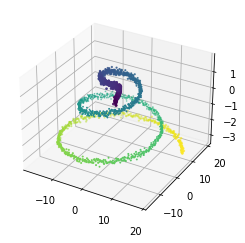

In [15]:
## matplotlib mpl_toolkits 4 dimensional data visualization
from mpl_toolkits.mplot3d import Axes3D

## create a new figure and add a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create a 3D scatter plot
# 'x', 'y', and 'z' represent the data points in 3D space
# 'c' specifies the color of each data point based on the 't' array
# 's' specifies the size of each data point, calculated based on the '3+a' expression
ax.scatter(x, y, z, c=t, s=3+a);

In [14]:
## Manifold learning - learning complex non linear relationships in the data

Running LLE
Running LTSA
Running Hessian LLE
Running Modified LLE
Running Isomap
Running MDS
Running SE
Running t-SNE


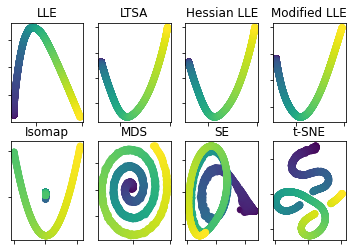

In [16]:
## sklearn manifold library - visualize the results of various manifold learning algorithms 
## using a scatter plot.

## list contains tuples, each representing a manifold learning algorithm 
## along with its corresponding parameters.
methods = [
    ("LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='standard')),
    ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors=20, method='ltsa')),
    ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='hessian')),
    ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='modified')),
    ("Isomap", manifold.Isomap()),
    ("MDS", manifold.MDS(n_init=1)),
    ("SE", manifold.SpectralEmbedding()),
    ("t-SNE", manifold.TSNE()),
]

## This line creates a 2x4 grid of subplots (8 subplots in total) 
## for visualizing the results of the manifold learning algorithms.
fig, axes = plt.subplots(nrows=2, ncols=4)


for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    Y = method.fit_transform(data)
    ax.scatter(Y[:, 0], Y[:, 1], c=t)
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])